# Coletando tweets através de uma consulta

In [ ]:
import snscrape.modules.twitter as snt
import pandas as pd 

In [ ]:
consulta  ="" 
tweets = []
limite = 150000

In [ ]:
for tweet in snt.TwitterSearchScraper(consulta).get_items():
   # print(vars(tweet))

    if len(tweets) == limite:
        break
    else:
        tweets.append([tweet.date, tweet.user.username, tweet.content])

In [ ]:
df = pd.DataFrame(tweets, columns=['date', 'user', 'tweet'])
df['date'] = df['date'].apply(lambda a: pd.to_datetime(a).date()) 
df

# Removendo links e nomes de usuário

In [ ]:
import re
def cleanTweets(text):
    text = re.sub(r"\B@\w+", "@user", text) 
    #text = re.sub(r'\B#\w+', '', text)      # removendo hashtags
    text = re.sub(r'https?:\/\/\S+', '', text)     # Substituindo links 
    return text

df['tweet'] = df['tweet'].apply(cleanTweets)


# Construindo uma nuvem de palavras

In [2]:
%pip install wordcloud


[notice] A new release of pip available: 22.1.2 -> 22.3.1
[notice] To update, run: C:\Users\cassi\AppData\Local\Microsoft\WindowsApps\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\python.exe -m pip install --upgrade pip
Note: you may need to restart the kernel to use updated packages.


In [39]:
import pandas as pd
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator
import numpy as np
import matplotlib.pyplot as plt

In [56]:
#df = pd.read_csv("twitterhatebr.csv", sep=';')
df

,date,user,tweet
0,2022-11-01,VakSendoUsado,@user Vc tomaria um café dessa velha vagabunda?
1,2022-10-30,LeticiaPimenta,"Não existe o bom, e sim o menos pior! Vem Lul..."
2,2021-12-24,renatowgomes,@user Então vc TB haverá de concordar em...\n\...
3,2022-10-18,guizerafn,@user ele é retardado\neu quase perdi um ouvido
4,2022-10-28,pedrogaspartel,@user @user Lula e o pt ficou 15 anos roubando...
...,...,...,...
810984,2020-06-25,gabivasconr,@user E aí que temos certeza que orientação se...
810985,2022-10-25,mozarrdsfiel,@user Audiência caiu por causa da dr bacalhau ...
810986,2022-11-06,simpleand4,Imagina a saia justa: os índios estão aderindo...
810987,2022-10-26,Patrici25151924,"@user @user @user E o PT?? Palocci, Genuino, D..."


In [57]:
textos = ' '.join(texto for texto in df['tweet'])
#textos

In [63]:
pt_stopw = []
arq = open("stopwords.txt", "r" , encoding="utf8") #Aqui você deve colocar o arquivo de stopwords disponível em https://gist.github.com/alopes/5358189
for linha in arq:
    pt_stopw.append(linha.replace('\n', '').replace(' ', ''))
pt_stopw.append('user')


In [64]:
stopwords = set(STOPWORDS)
stopwords.update(words for words in pt_stopw)

TypeError: unhashable type: 'list'

In [60]:
wordcloud = WordCloud(stopwords=stopwords, background_color='black', width=1000, height=500).generate(textos)

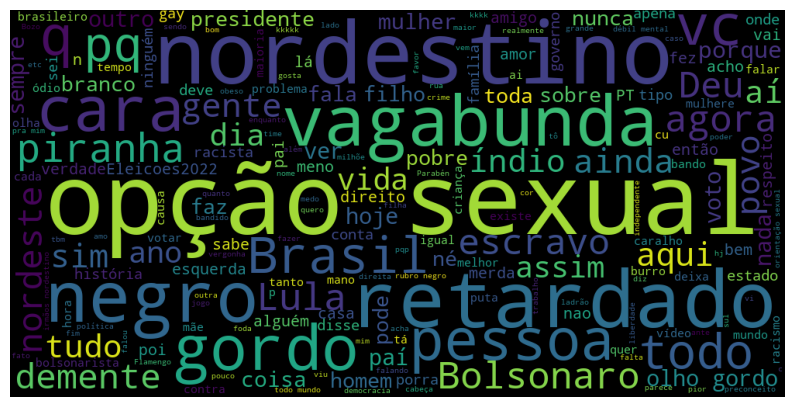

In [61]:
fig, ax = plt.subplots(figsize=(10,6))
ax.imshow(wordcloud, interpolation='bilinear')
ax.set_axis_off()

plt.imshow(wordcloud)
wordcloud.to_file("hatecloud3.png")